<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Чтобы детерминировать алгоритмы, чтобы была воспроизводимость результатов

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [193]:
import pandas as pd

In [194]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [195]:
# Отобразите 30 случайных строк тренировочного датасета.
df_train.sample(30)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [196]:
# Отобразите первые 5
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [197]:
# и последние 5 объектов тестового датасета
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [198]:
# *выведу инфу чтобы понять дататайпы еще*
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


In [199]:
# Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения

def have_propuski(df: pd.DataFrame):
  return df.columns[df.isnull().any()].to_list()

print(f'В тесте пропуски: {have_propuski(df_test)}')
print(f'В трейне пропуски: {have_propuski(df_train)}')

В тесте пропуски: ['mileage', 'engine', 'max_power', 'torque', 'seats']
В трейне пропуски: ['mileage', 'engine', 'max_power', 'torque', 'seats']


In [200]:
# Посмотрите, есть ли в данных явные дубликаты

print(f'В тесте дубликаты: {df_test.duplicated().sum()}')
print(f'В трейне дубликаты: {df_train.duplicated().sum()}')

В тесте дубликаты: 62
В трейне дубликаты: 985


1. **Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?**

**Выводы:**
В рандомных строках увидел пропуски.

Можно понять, какие строки являются категориальными признаками, какие числовыми. Можно понять, какие значения принимают колонки. Можно заметить что некоторые колонки можно перевести в числовые признаки:

Колонку **mileage** можно привести к числу (условно mileage="19.81 kmpl" -> milage_kmpl=19.81).

Тоже самое с **max_power** (max_power="60.05 bhp" -> max_power_bhp=60.05)

И **engine**

А **torque** можно разделить на две колонки (если сильно захотеть)

Еще **owner** можно попробовать перевести, но там логика сложнее


**Нельзя** сделать выводы о выбросах, распределении, корреляции - все это неочевидно, конечно.

2. **Достаточно ли метода duplicated для анализа дубликатов? Почему?**

Не всегда, так как duplicated ищет полное совпадение по всем колонкам. Бывает, что один и тот же объект имеет немного другое название (на один символ, допустим, отличается) - это не будет являться дубликатом, хотя по факту - дубликат. Также может различаться не очень важная колонка, а все остальное совпадать - тоже не дубликат, хотя, хотелось бы его таковым считать

In [235]:
!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.2 MB/s eta 0:00:00


In [238]:
# Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)
from ydata_profiling import ProfileReport
profile = ProfileReport(df_train, explorative=True)
profile.to_file("ydata-profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 40.16it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [202]:
 # Сделал ниже

In [203]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [204]:
# Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
df_train_X = df_train.drop('selling_price', axis=1)
print(f'duplicated: {df_train_X.duplicated().sum()}')

duplicated: 1159


In [205]:
# Отобразите такие объекты (0.15 балла)
df_train_X[df_train_X.duplicated()]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [206]:
# Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
df_train = df_train.loc[~df_train_X.duplicated(keep='first')] # keep='first' вообще по-дефолту стоит, но явно написал

In [207]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [208]:
def fix_datatypes(df: pd.DataFrame, cols: list):
  for col in cols:
    df[col] = (
        df[col]
        .str.extract(r'([\d\.]+)')
        .astype(float)
    )

def fill_nans(df_train: pd.DataFrame, df_test: pd.DataFrame, cols: list):
  for col in cols:
    median = df_train[col].median()
    df_train[col] = df_train[col].fillna(median)
    df_test[col] = df_test[col].fillna(median)

In [209]:
df_test.drop('torque', axis=1, inplace=True)
df_train.drop('torque', axis=1, inplace=True)

fix_datatypes(df_test, ['max_power', 'engine', 'mileage'])
fix_datatypes(df_train, ['max_power', 'engine', 'mileage'])
fill_nans(df_train, df_test, ['max_power', 'engine', 'mileage', 'seats'])

In [210]:
print(f'В тесте пропуски: {have_propuski(df_test)}')
print(f'В трейне пропуски: {have_propuski(df_train)}')

В тесте пропуски: []
В трейне пропуски: []


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [211]:
# your code here

df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

In [212]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5840 entries, 0 to 6996
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int64  
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 593.1+ KB


### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [213]:
df_train.describe().round(4)

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.0000,5.840000e+03,5.840000e+03,5840.0000,5840.0000,5840.0000,5840.0000
mean,2013.4284,5.229601e+05,7.395224e+04,19.4308,1429.4490,87.9064,5.4267
std,4.0956,5.354320e+05,6.007114e+04,3.9860,485.6628,31.6404,0.9823
min,1983.0000,2.999900e+04,1.000000e+00,0.0000,624.0000,0.0000,2.0000
25%,2011.0000,2.500000e+05,3.900000e+04,16.9500,1197.0000,68.0000,5.0000
50%,2014.0000,4.050000e+05,7.000000e+04,19.3700,1248.0000,81.8600,5.0000
75%,2017.0000,6.400000e+05,1.000000e+05,22.3000,1498.0000,99.0000,5.0000
max,2020.0000,1.000000e+07,2.360457e+06,42.0000,3604.0000,400.0000,14.0000


In [214]:
df_test.describe().round(4)

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.0000,1.000000e+03,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000
mean,2013.6810,6.179010e+05,71393.3410,19.3388,1454.8760,90.8417,5.4030
std,4.0121,7.585539e+05,48486.2187,3.9518,521.9957,34.8934,0.9129
min,1995.0000,3.100000e+04,1303.0000,0.0000,624.0000,34.2000,4.0000
25%,2011.0000,2.500000e+05,37000.0000,16.5500,1197.0000,69.0000,5.0000
50%,2014.0000,4.349990e+05,61500.0000,19.3700,1248.0000,82.4250,5.0000
75%,2017.0000,6.700000e+05,100000.0000,22.3000,1582.0000,102.0000,5.0000
max,2020.0000,6.000000e+06,375000.0000,32.2600,3604.0000,280.0000,9.0000


In [215]:
cat_cols_train = df_train.select_dtypes(include='object')
cat_cols_test = df_test.select_dtypes(include='object')

cat_stats_train = cat_cols_train.describe()
cat_stats_test = cat_cols_test.describe()

cat_stats_train

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [216]:
cat_stats_test

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


**Вывод:** судя по значениям минимума видно, что max_power == 0 вряд ли корректное значение, возможно - это выброс. По остальным столбцам выбрасов по максимуму, минимуму, среднему не видно.

по count пропусков нет (но мы в этом выше убедились)

по категориальным:

по count пропусков нет (но мы в этом выше убедились)

transmission можно перевести в bool (если хочется в колонку is_manual, например)

seller_type сильно не сбалансирован (для трейна 5223/5840 являются Individual, хотя 3 принимаемых значения)

In [217]:
assert df_train.shape == (5840, 12) # 12, т.к. удалил столбец torque

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

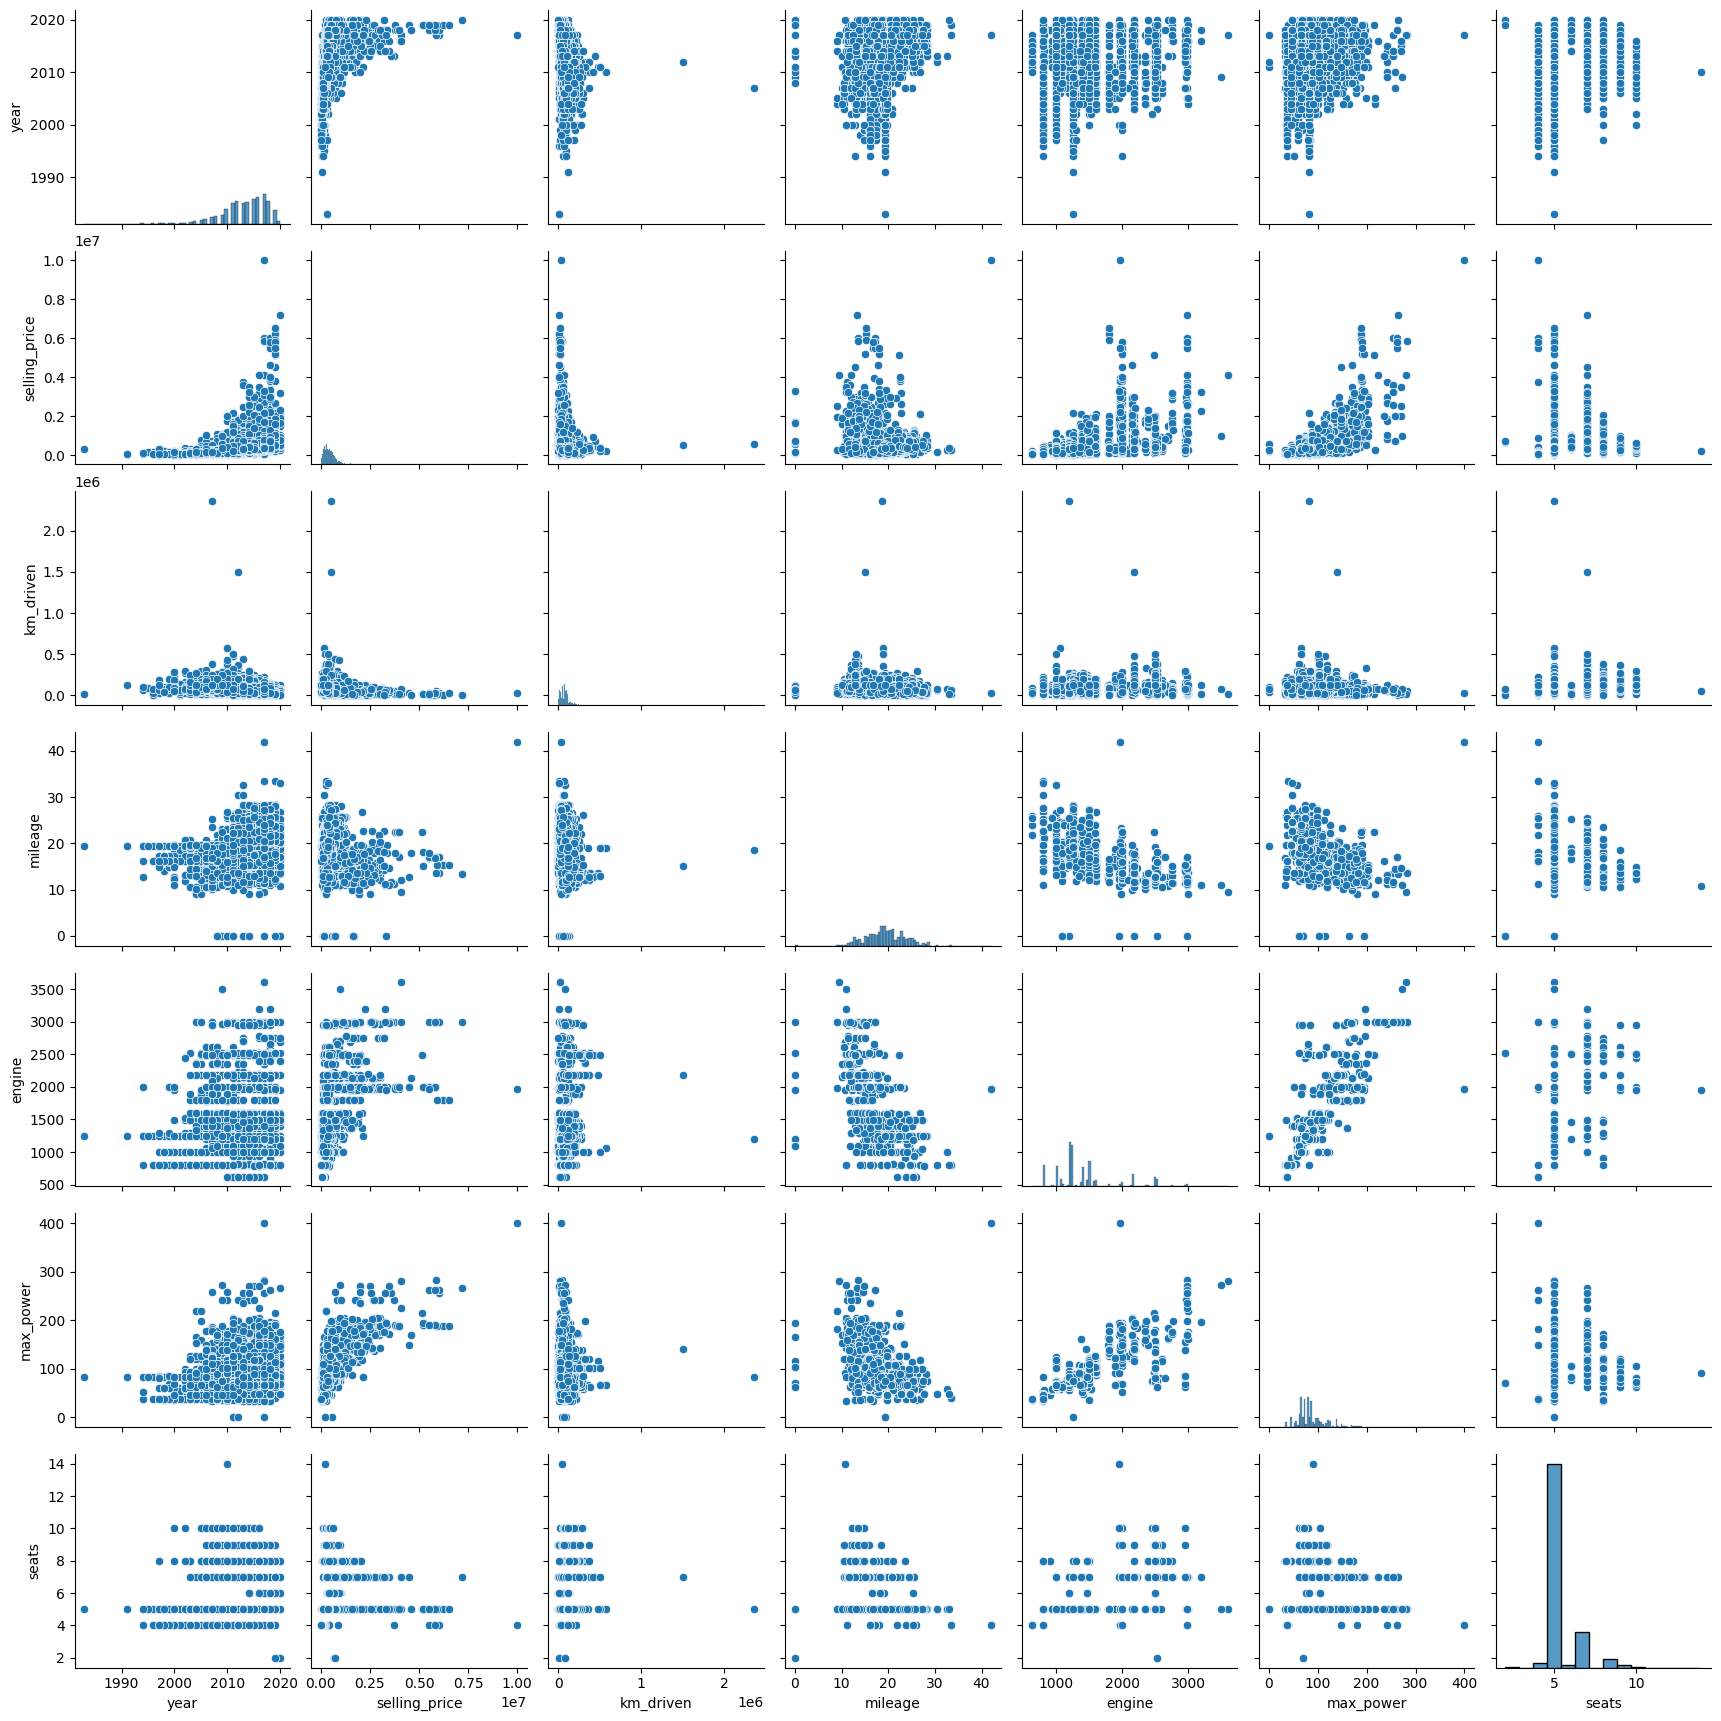

In [218]:
import seaborn as sns

sns.pairplot(df_train.select_dtypes(include='number'))

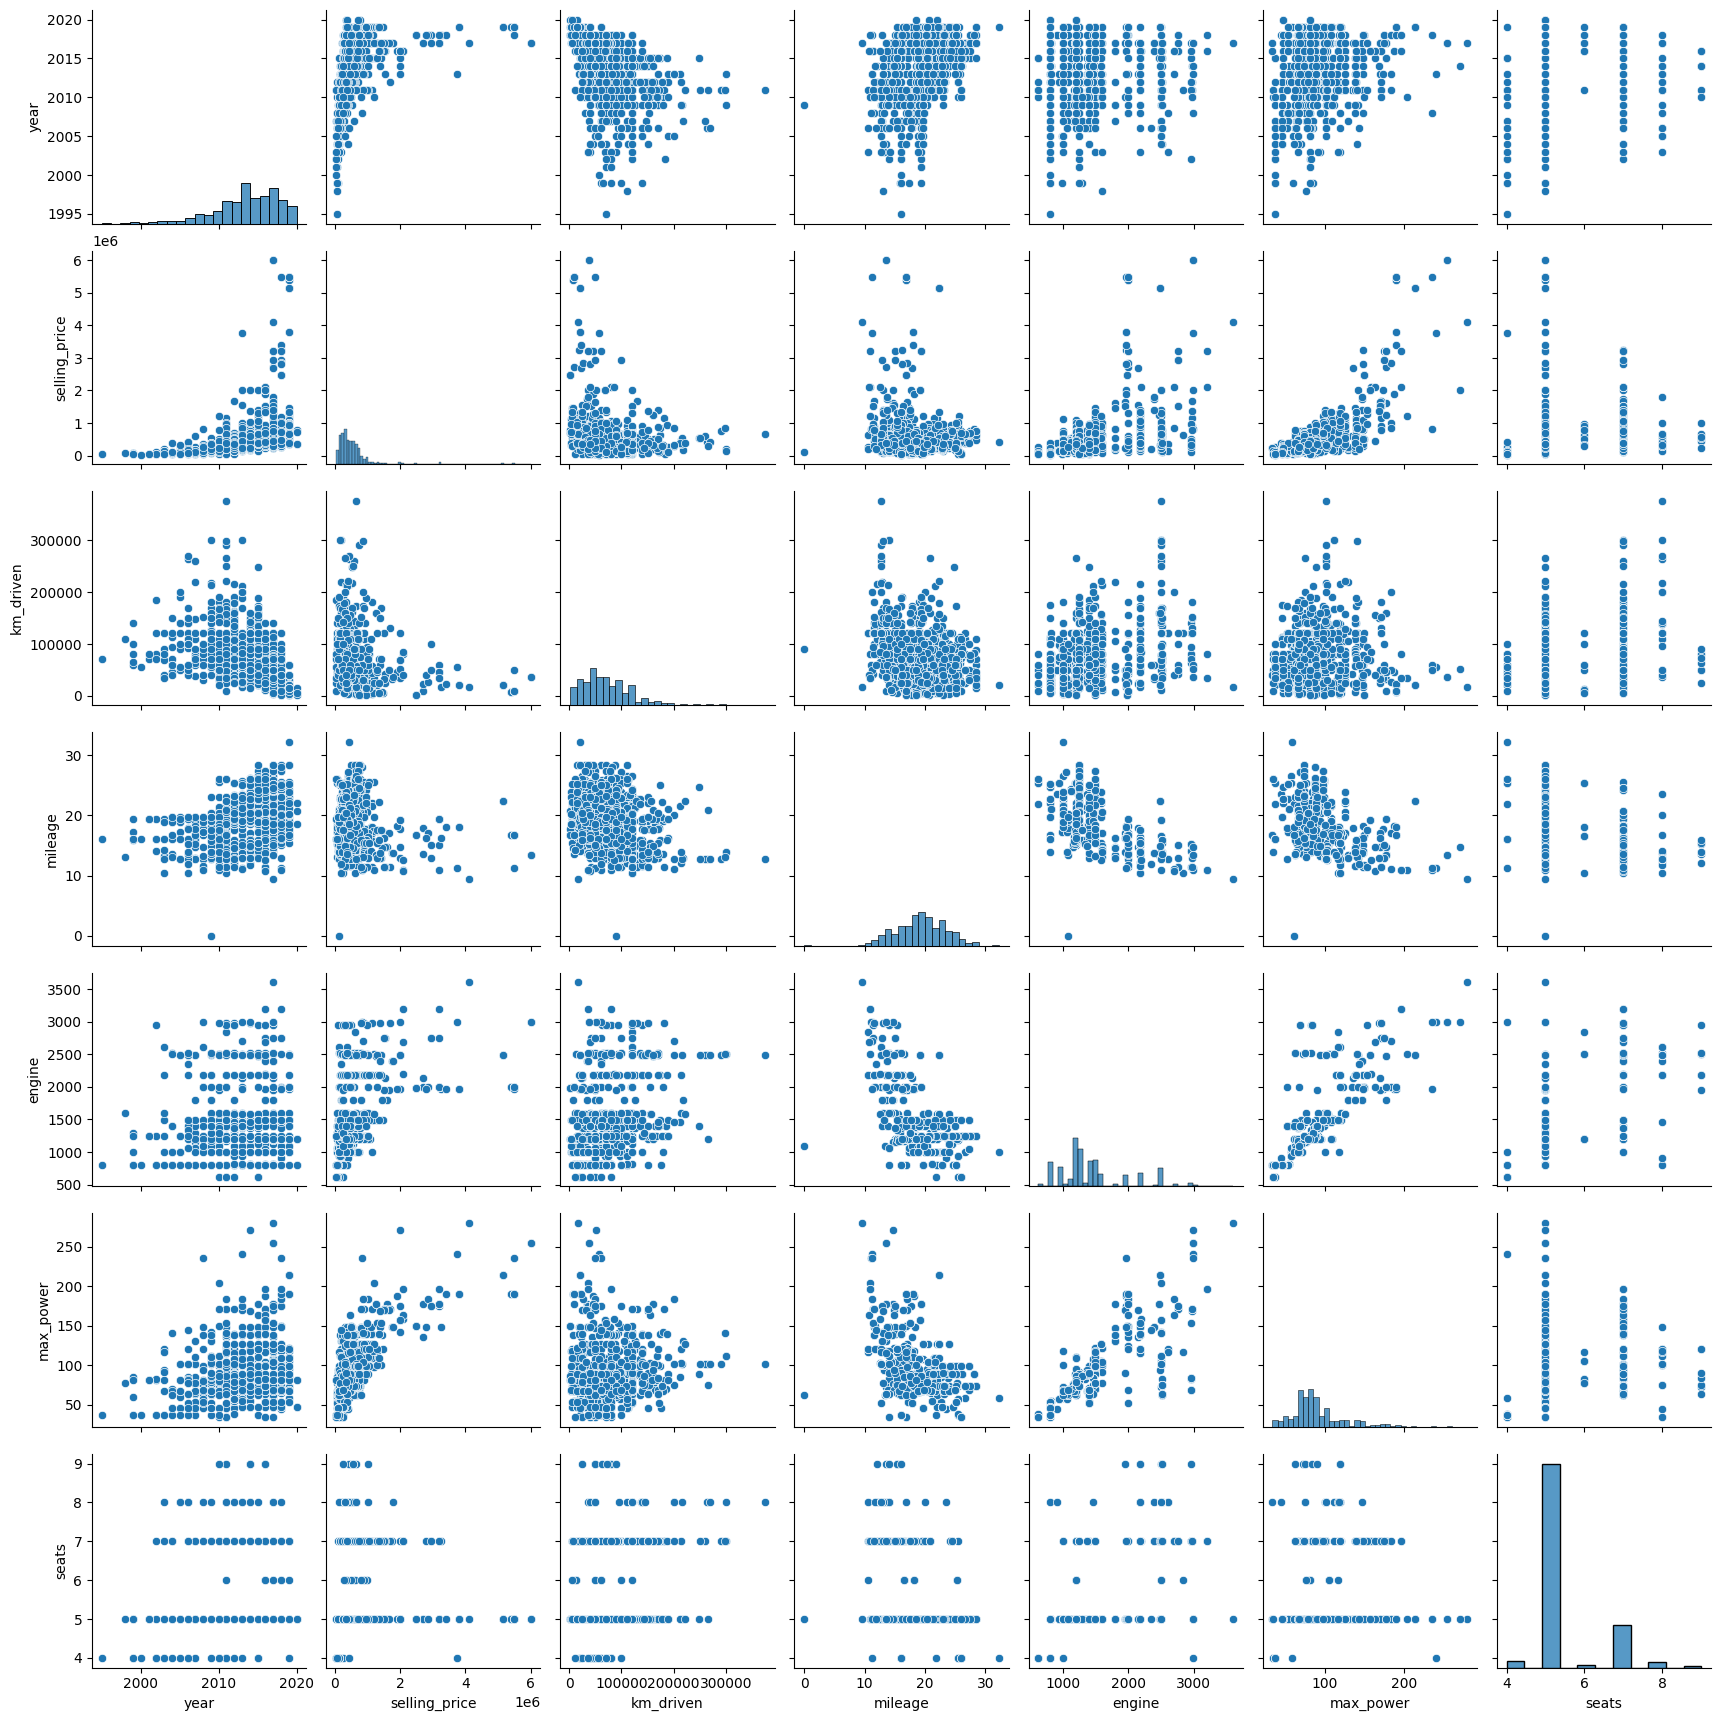

In [219]:
sns.pairplot(df_test.select_dtypes(include='number'))

**Выводы:**
---
Из диаграмм рассеяния:
---

Видна положительная линейная зависимость (или корреляция):

max_power -> engine - т.е. max_power растет с ростом engine (и наоборот)

selling_price -> max_power положительно коррелирует (но четкую линию тоже не видно)

mileage -> engine тоже отрицательно коррелирует, но не сильно

selling_price -> year немного коррелирует положительно (но линию четко не проведешь)

По распределениям:
---

у колонок: year, selling_price, km_driven, mileage, max_power похоже на нормальное

у колонок seats, engine не уверен что нормальное

Train <-> Test
---

По распределениям похожи

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


<Axes: >

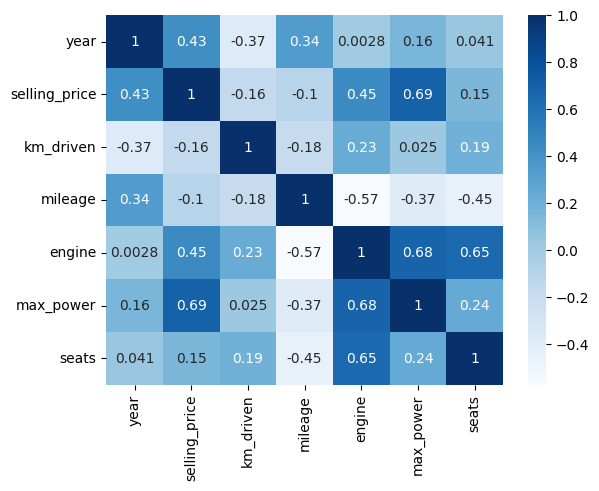

In [220]:
sns.heatmap(df_train.select_dtypes(include='number').corr(), cmap="Blues", annot=True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Корреляции
---
Наименее скоррелированы:

year <-> engine = 0.0028
year <-> seats = 0.041

Сильная положительная линейная зависимость:

* selling_price <-> max_power = 0.69
* max_power <-> engine = 0.68
* seats <-> engine = 0.65
* selling_price <-> engine = 0.45
* selling_price <-> year = 0.43
* year <-> mileage = 0.34

Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
---
Ну, т.к year <-> km_driven = -0.37 - т.е. неплохо отрицательно коррелируют, то **да**, чем меньше year, тем больше km_driven


### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

In [221]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [222]:
X_train = df_train.select_dtypes(include='number').copy()
X_test = df_test.select_dtypes(include='number').copy()

In [223]:
y_train = X_train['selling_price']
X_train = X_train.drop('selling_price', axis=1)

In [224]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5840 entries, 0 to 6996
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       5840 non-null   int64  
 1   km_driven  5840 non-null   int64  
 2   mileage    5840 non-null   float64
 3   engine     5840 non-null   int64  
 4   max_power  5840 non-null   float64
 5   seats      5840 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 319.4 KB


Итого
---
* year - год
* km_driven - пробег
* mileage - расход топлива
* engine - год двигателя
* max_power - макс мощьность
* seats - кол-во сидений

In [225]:
y_test = X_test['selling_price']
X_test = X_test.drop('selling_price', axis=1)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [226]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(f'''Metrics:
mse={MSE(y_test, pred)}
R2={r2_score(y_test, pred)}
''')

Metrics:
mse=233298779730.45486
R2=0.5941419794788428



R2 = 0.59 неплохая оценка (чем ближе к 1 - тем лучше)

По MSE сложно понять, т.к. метрика дает квадрат единиц измерения. Взять корень: 483010 денег - как будто не очень большая погрешность в рамках среднего для selling_price (для df_train ~5229601 денег)

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [227]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [228]:
import joblib

joblib.dump(scaler, "scaler.pkl") # сохраним для streamlit

['scaler.pkl']

In [172]:
pd.DataFrame(X_train_scaled).describe()

,year,km_driven,mileage,engine,max_power,seats
count,5.840000e+03,5.840000e+03,5.840000e+03,5.840000e+03,5.840000e+03,5.840000e+03
mean,2.328122e-14,-6.205082e-17,-9.283290e-16,-1.301851e-16,3.485796e-16,2.640202e-16
std,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00
min,-7.430137e+00,-1.231167e+00,-4.875222e+00,-1.658595e+00,-2.778531e+00,-3.488601e+00
25%,-5.929826e-01,-5.818974e-01,-6.224460e-01,-4.786631e-01,-6.291976e-01,-4.344190e-01
50%,1.395696e-01,-6.579834e-02,-1.526502e-02,-3.736430e-01,-1.911128e-01,-4.344190e-01
75%,8.721218e-01,4.336523e-01,7.198756e-01,1.411615e-01,3.506458e-01,-4.344190e-01
max,1.604674e+00,3.806654e+01,5.662630e+00,4.477875e+00,9.864609e+00,8.728126e+00


In [230]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

pred = model.predict(X_test_scaled)

print(f'''Metrics:
mse={MSE(y_test, pred)}
R2={r2_score(y_test, pred)}
''')

Metrics:
mse=233298779730.44965
R2=0.594141979478852



In [232]:
import joblib

joblib.dump(model, "model.pkl") # сохраним для streamlit

['model.pkl']

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [174]:
model.coef_

array([152772.57084581, -44158.81852005,  28833.92577752,  61178.49433685,
       322807.35325923, -23209.132486  ])

Судя по всему, самым информативным оказался признак **max_power** (для него b4 = 322807)

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [175]:
from sklearn.linear_model import Lasso

lasso = Lasso(random_state=42)

lasso.fit(X_train_scaled, y_train)
pred_lasso = lasso.predict(X_test_scaled)

print(f'''Lasso metrics:
mse={MSE(y_test, pred_lasso)}
R2={r2_score(y_test, pred_lasso)}
''')

Lasso metrics:
mse=233299450599.16928
R2=0.5941408124026637



In [176]:
lasso.coef_

array([152772.3902142 , -44157.68985794,  28832.04339588,  61173.66240922,
       322808.23691947, -23206.25564908])

Качество не изменилось. Lasso ничего не занулило, т.к. все признаки более менее содержат информацию

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [239]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]}

lasso = Lasso(random_state=42)
grid = GridSearchCV(lasso, param_grid, cv=10, scoring='r2')
grid.fit(X_train_scaled, y_train)

best_lasso = grid.best_estimator_
pred_lasso_best = best_lasso.predict(X_test_scaled)

print(f'''Metrics for best Lasso:
MSE = {MSE(y_test, pred_lasso_best)}
R2  = {r2_score(y_test, pred_lasso_best)}
''')

Metrics for best Lasso:
MSE = 233305498918.34268
R2  = 0.5941302904494412



In [240]:
# Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?
best_params = grid.best_params_
print(best_params)

{'alpha': 10.0}


Сколько грид-сёрчу пришлось обучать моделей?
len(alpha) * cv = 60 (в моем случае)

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [128]:
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 5.0],
    'l1_ratio': [0.2, 0.5, 0.8, 1.0]
}

elastic = ElasticNet(random_state=42)

grid_en = GridSearchCV(elastic, param_grid, cv=10, scoring='r2')
grid_en.fit(X_train_scaled, y_train)



GridSearchCV(cv=10, estimator=ElasticNet(random_state=42),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 5.0],
                         'l1_ratio': [0.2, 0.5, 0.8, 1.0]},
             scoring='r2')

In [129]:
# Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?
best_params = grid_en.best_params_
print(best_params)

{'alpha': 0.5, 'l1_ratio': 0.8}


In [130]:
best_en = grid_en.best_estimator_
pred_en = best_en.predict(X_test_scaled)

print(f'''Metrics for best ElasticNet:
MSE = {MSE(y_test, pred_en)}
R2  = {r2_score(y_test, pred_en)}
''')

Metrics for best ElasticNet:
MSE = 245894236734.6667
R2  = 0.5722303035875462



Сколько грид-сёрчу пришлось обучать моделей?
---
- len(alpha) * len(l1_ratio) * cv = 200 (в моем случае)

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [108]:
df_train_2 = df_train.drop('name', axis=1).copy()
df_test_2 = df_test.drop('name', axis=1).copy()

y_train_cat = df_train_2['selling_price']
X_train_cat = df_train_2.drop('selling_price', axis=1).copy()
y_test_cat = df_test_2['selling_price']
X_test_cat = df_test_2.drop('selling_price', axis=1).copy()

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [109]:
assert X_train_cat.shape == (5840, 10)

In [110]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [148]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

cat_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

X_train_encoded = pd.get_dummies(X_train_cat, columns=cat_features, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_cat, columns=cat_features, drop_first=True)

In [149]:
X_train_encoded.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_4', 'seats_5',
       'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10', 'seats_14'],
      dtype='object')

In [150]:
X_test_encoded.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_5', 'seats_6',
       'seats_7', 'seats_8', 'seats_9'],
      dtype='object')

In [151]:
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=False) # чтобы колонки одинаковые были (в тесте меньше значений seats)
assert list(X_test_encoded.columns) == list(X_train_encoded.columns)

In [152]:
X_train_encoded.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_4', 'seats_5',
       'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10', 'seats_14'],
      dtype='object')

In [153]:
# Кажется, он уже удалил одну из колонок для избежания мультиколлинеарности (например для transmission с двумя возможными значениями у меня всего одная колонка - как и должно быть)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [154]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]}

ridge = Ridge(random_state=42)

grid_ridge = GridSearchCV(ridge, param_grid, cv=10, scoring='r2')
grid_ridge.fit(X_train_encoded, y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=42),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0,
                                   100.0]},
             scoring='r2')

In [155]:
best_ridge = grid_ridge.best_estimator_
best_alpha = grid_ridge.best_params_['alpha']

In [156]:
pred_ridge = best_ridge.predict(X_test_encoded)

In [157]:
mse_ridge = MSE(y_test, pred_ridge)
r2_ridge = r2_score(y_test, pred_ridge)

print(f'''Metrics for Ridge (best alpha):
MSE = {mse_ridge}
R2  = {r2_ridge}
''')

Metrics for Ridge (best alpha):
MSE = 207356342810.85007
R2  = 0.6392727174443418



# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [169]:
def business_metric(y_true, y_pred):
  y_true = pd.Series(y_true)
  y_pred = pd.Series(y_pred)

  diff_percent = abs(y_true - y_pred) / y_true

  score = (diff_percent <= 0.10).mean()
  return score

print('Ridge', business_metric(y_test, pred_ridge))
print('Elastic Net', business_metric(y_test, pred_en))
print('Lasso', business_metric(y_test, pred_lasso_best))
print('Default Linear regression', business_metric(y_test, pred))

Ridge 0.247
Elastic Net 0.241
Lasso 0.227
Default Linear regression 0.227


Лучше всего по бизнес метрике справился **Ridge**

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (2 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.